In [2]:
%reset -f

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import datetime as dt
import re

In [4]:
def cm2inch(cm: float) -> float:
    return cm * (1 / 2.54)

This portion of code is for those who use vscode and use a custom theme, this will avoid that pesky white line when ploting

In [5]:
%%html
<style>
.cell-output-ipywidget-background {
   background-color: transparent !important;
}
.jp-OutputArea-output {
   background-color: transparent;
}  
</style>

Through the the file presented below I use the style fivethirtyeight (this is just a personal choose), but, you can reverse and use the default one

- plt.style.use('default')
- plt.style.use('fivethirtyeight')

# Color pallet

A simple color pallet

In [6]:
colors ={
    'red': '#EB1E2C',
    'orange1': '#FD6F30',
    'orange2': '#F9A729',
    'yellow': '#F9D23C',
    'green': '#5FBB68',
    'blue': '#00A5E3',
    'teal': '#64CDCC',
    'aqua': '#91DCEA',
    'purple': '#A4A4D5',
    'ligth_purple': '#BBC9E5',
}
 

# Main code
Now, we star our analysis, I'll be using the Salmon Dataset (https://www.kaggle.com/datasets/michaelbryantds/salmon-dataset)

In [7]:
df = pd.read_csv('data_sets/salmon_dataset.csv', low_memory = False)
df.head()

,Species,Length.Measurement.Type,sampleYear,ASLProjectType,LocationID,sampleDate,Length,Weight,Sex,Salt.Water.Age,...,Flag,Gear,SASAP.Region,LocationUnique,DistrictID,Sub.DistrictID,Stat.area,Lat,Lon,AWC_CODE
0,chinook,length not taken,1992.0,commercial catch,Affleck Canal/Spanish Is/Louise Cove,1992-03-31,NaN,NaN,examined but did not identify,3.0,...,NaN,troll,Southeast,Affleck Canal/Spanish Is/Louise Cove-commercia...,105.0,10.0,10510.0,NaN,NaN,NaN
1,chinook,length not taken,1992.0,commercial catch,Affleck Canal/Spanish Is/Louise Cove,1992-03-31,NaN,NaN,examined but did not identify,3.0,...,NaN,troll,Southeast,Affleck Canal/Spanish Is/Louise Cove-commercia...,105.0,10.0,10510.0,NaN,NaN,NaN
2,chinook,length not taken,1992.0,commercial catch,Affleck Canal/Spanish Is/Louise Cove,1992-03-31,NaN,NaN,examined but did not identify,3.0,...,NaN,troll,Southeast,Affleck Canal/Spanish Is/Louise Cove-commercia...,105.0,10.0,10510.0,NaN,NaN,NaN
3,chinook,length not taken,1992.0,commercial catch,Affleck Canal/Spanish Is/Louise Cove,1992-03-31,NaN,NaN,examined but did not identify,3.0,...,NaN,troll,Southeast,Affleck Canal/Spanish Is/Louise Cove-commercia...,105.0,10.0,10510.0,NaN,NaN,NaN
4,chinook,length not taken,1992.0,commercial catch,Affleck Canal/Spanish Is/Louise Cove,1992-03-31,NaN,NaN,examined but did not identify,4.0,...,NaN,troll,Southeast,Affleck Canal/Spanish Is/Louise Cove-commercia...,105.0,10.0,10510.0,NaN,NaN,NaN


In [8]:
# look at the column 'sampleYear'
df['sampleYear']

0           1992.0
1           1992.0
2           1992.0
3           1992.0
4           1992.0
             ...  
14347456    2015.0
14347457    2015.0
14347458    2015.0
14347459    2015.0
14347460    2015.0
Name: sampleYear, Length: 14347461, dtype: float64

In [9]:
# print some characteristics of the dataframe, that will be use later
print('Column names:', df.keys(),
    '\n\nshape:', df.shape,
    '\n\nAll regions:', df['SASAP.Region'].unique(),
    '\n\nAll species:', df['Species'].unique(),
    '\n\nFish num:', df['fishNum'].unique(),
    '\n\nSex:', df['Sex'].unique())

Column names: Index(['Species', 'Length.Measurement.Type', 'sampleYear', 'ASLProjectType',
       'LocationID', 'sampleDate', 'Length', 'Weight', 'Sex', 'Salt.Water.Age',
       'DataSource', 'cardNo', 'fishNum', 'Age.Error', 'Fresh.Water.Age',
       'Sex.Determination.Method', 'subSystem', 'Flag', 'Gear', 'SASAP.Region',
       'LocationUnique', 'DistrictID', 'Sub.DistrictID', 'Stat.area', 'Lat',
       'Lon', 'AWC_CODE'],
      dtype='object') 

shape: (14347461, 27) 

All regions: ['Southeast' 'Cook Inlet' 'Prince William Sound' 'Yukon' 'Kodiak'
 'Alaska Peninsula and Aleutian Islands' 'Kuskokwim' 'Chignik'
 'Copper River' 'Bristol Bay' 'Norton Sound' 'Kotzebue'] 

All species: ['chinook' 'chum' 'coho' 'pink' 'sockeye'] 

Fish num: [nan '1' '2' ... '1788' 'no scales' 'data'] 

Sex: ['examined but did not identify' 'male' 'female' 'unknown' nan '2' '1' '0'
 '3']


In [10]:
# selecting all males an females
df_sex = df[(df['Sex'] == 'male') | (df['Sex'] == 'female')]

Creating the main dataframe that we will work on.
Here we will examine this data with the following information, the species, sex year of the sample, region and length

In [11]:
df_resume = df_sex.groupby(['Species','Sex','SASAP.Region','sampleYear']).agg({'Length': (np.nanmean, np.nanstd, np.count_nonzero)})
df_resume.dropna(inplace = True)
df_resume.reset_index(inplace = True)
df_resume

Species     Sex                           SASAP.Region sampleYear  \
                                                                          
0     chinook  female  Alaska Peninsula and Aleutian Islands     1985.0   
1     chinook  female  Alaska Peninsula and Aleutian Islands     1986.0   
2     chinook  female  Alaska Peninsula and Aleutian Islands     1987.0   
3     chinook  female  Alaska Peninsula and Aleutian Islands     1988.0   
4     chinook  female  Alaska Peninsula and Aleutian Islands     1989.0   
...       ...     ...                                    ...        ...   
3175  sockeye    male                                  Yukon     2012.0   
3176  sockeye    male                                  Yukon     2013.0   
3177  sockeye    male                                  Yukon     2014.0   
3178  sockeye    male                                  Yukon     2015.0   
3179  sockeye    male                                  Yukon     2016.0   

          Length                            
         nanmean      nanstd count_nonzero  
0     788.095890  111.004898           146  
1     761.882818  115.785480          1532  
2     789.976949   84.767470          2051  
3     777.900174  106.973845          1426  
4     799.184669   56.365957           732  
...          ...         ...           ...  
3175  559.000000   62.341800             5  
3176  595.125000   16.260711             8  
3177  576.117647   45.184182            17  
3178  549.888889   48.943020            45  
3179  551.600000   48.115931            50  

[3180 rows x 7 columns]

In [12]:
# this row is just to check the information que are generating on the first line of df_resume (df_resume[0])
df[(df['Species'] == 'chinook') & (df['Sex'] == 'female') & (df['sampleYear'] == 1957) & (df['SASAP.Region'] == 'Bristol Bay')]

,Species,Length.Measurement.Type,sampleYear,ASLProjectType,LocationID,sampleDate,Length,Weight,Sex,Salt.Water.Age,...,Flag,Gear,SASAP.Region,LocationUnique,DistrictID,Sub.DistrictID,Stat.area,Lat,Lon,AWC_CODE
860167,chinook,mid-eye to fork of tail,1957.0,escapement,Nushagak River,1957-08-07,781.0,NaN,female,4.0,...,NaN,NaN,Bristol Bay,Nushagak River-escapement-32530,325.0,30.0,32530.0,58.906142,-157.733584,325-30-10100
860168,chinook,mid-eye to fork of tail,1957.0,escapement,Nushagak River,1957-08-07,810.0,NaN,female,4.0,...,NaN,NaN,Bristol Bay,Nushagak River-escapement-32530,325.0,30.0,32530.0,58.906142,-157.733584,325-30-10100
860169,chinook,mid-eye to fork of tail,1957.0,escapement,Nushagak River,1957-08-07,845.0,NaN,female,NaN,...,NaN,NaN,Bristol Bay,Nushagak River-escapement-32530,325.0,30.0,32530.0,58.906142,-157.733584,325-30-10100
860170,chinook,mid-eye to fork of tail,1957.0,escapement,Nushagak River,1957-08-07,699.0,NaN,female,3.0,...,NaN,NaN,Bristol Bay,Nushagak River-escapement-32530,325.0,30.0,32530.0,58.906142,-157.733584,325-30-10100
860171,chinook,mid-eye to fork of tail,1957.0,escapement,Nushagak River,1957-08-07,781.0,NaN,female,4.0,...,NaN,NaN,Bristol Bay,Nushagak River-escapement-32530,325.0,30.0,32530.0,58.906142,-157.733584,325-30-10100
860172,chinook,mid-eye to fork of tail,1957.0,escapement,Nushagak River,1957-08-07,787.0,NaN,female,3.0,...,NaN,NaN,Bristol Bay,Nushagak River-escapement-32530,325.0,30.0,32530.0,58.906142,-157.733584,325-30-10100
860173,chinook,mid-eye to fork of tail,1957.0,escapement,Nushagak River,1957-08-07,584.0,NaN,female,3.0,...,NaN,NaN,Bristol Bay,Nushagak River-escapement-32530,325.0,30.0,32530.0,58.906142,-157.733584,325-30-10100
860174,chinook,mid-eye to fork of tail,1957.0,escapement,Nushagak River,1957-08-07,521.0,NaN,female,3.0,...,NaN,NaN,Bristol Bay,Nushagak River-escapement-32530,325.0,30.0,32530.0,58.906142,-157.733584,325-30-10100
860175,chinook,mid-eye to fork of tail,1957.0,escapement,Nushagak River,1957-08-07,635.0,NaN,female,3.0,...,NaN,NaN,Bristol Bay,Nushagak River-escapement-32530,325.0,30.0,32530.0,58.906142,-157.733584,325-30-10100
860176,chinook,mid-eye to fork of tail,1957.0,escapement,Nushagak River,1957-08-07,495.0,NaN,female,3.0,...,NaN,NaN,Bristol Bay,Nushagak River-escapement-32530,325.0,30.0,32530.0,58.906142,-157.733584,325-30-10100


In [13]:
df_resume.rename(columns = {'Species': 'species', 'Sex': 'sex', 'sampleYear': 'sample year', 
    'SASAP.Region': 'region', 'Length': 'length', 'nanmean': 'mean', 'nanstd': 'std', 'count_nonzero': 'count'}, inplace = True)

Now let's asume the data is distributed normally, so we can calculate the confidence interval with 95 \% following the formula $$\overline{x} \pm 1.96 \sigma_{\overline{x}}$$ where $\sigma_{\overline{x}}$ is the standar error as follows: $$\sigma_{\overline{x}} = \dfrac{\sigma}{\sqrt{n}}$$ with $\sigma$ being the standard deviation and $n$ is the sample size.
Finally, inorder to calculate the uncertainty (also called the error), we need de upper value of the confidence interval (or lower, since the error is symmetrical). Since we have the mean, and the confidence intervals, the error is: $$\mathrm{error} = \mathrm{upper\ limit} - \mu$$ or $$\mathrm{error} = \mu - \mathrm{lower\ limit}$$

In [14]:
df_resume['standar error'] = df_resume['length']['std'] / np.sqrt(df_resume['length']['count'])
df_resume['conficende interval lower limit'] = df_resume['length']['mean'] - (1.96 * df_resume['standar error'])
df_resume['conficende interval upper limit'] = df_resume['length']['mean'] + (1.96 * df_resume['standar error'])
df_resume['error'] = df_resume['length']['mean'] - df_resume['conficende interval lower limit']
df_resume

species     sex                                 region sample year  \
                                                                           
0     chinook  female  Alaska Peninsula and Aleutian Islands      1985.0   
1     chinook  female  Alaska Peninsula and Aleutian Islands      1986.0   
2     chinook  female  Alaska Peninsula and Aleutian Islands      1987.0   
3     chinook  female  Alaska Peninsula and Aleutian Islands      1988.0   
4     chinook  female  Alaska Peninsula and Aleutian Islands      1989.0   
...       ...     ...                                    ...         ...   
3175  sockeye    male                                  Yukon      2012.0   
3176  sockeye    male                                  Yukon      2013.0   
3177  sockeye    male                                  Yukon      2014.0   
3178  sockeye    male                                  Yukon      2015.0   
3179  sockeye    male                                  Yukon      2016.0   

          length                   standar error  \
            mean         std count                 
0     788.095890  111.004898   146      9.186831   
1     761.882818  115.785480  1532      2.958181   
2     789.976949   84.767470  2051      1.871744   
3     777.900174  106.973845  1426      2.832813   
4     799.184669   56.365957   732      2.083346   
...          ...         ...   ...           ...   
3175  559.000000   62.341800     5     27.880100   
3176  595.125000   16.260711     8      5.749029   
3177  576.117647   45.184182    17     10.958774   
3178  549.888889   48.943020    45      7.295995   
3179  551.600000   48.115931    50      6.804620   

     conficende interval lower limit conficende interval upper limit  \
                                                                       
0                         770.089702                      806.102079   
1                         756.084783                      767.680852   
2                         786.308332                      793.645567   
3                         772.347861                      783.452486   
4                         795.101311                      803.268027   
...                              ...                             ...   
3175                      504.355003                      613.644997   
3176                      583.856902                      606.393098   
3177                      554.638450                      597.596844   
3178                      535.588739                      564.189038   
3179                      538.262944                      564.937056   

          error  
                 
0     18.006188  
1      5.798034  
2      3.668618  
3      5.552313  
4      4.083358  
...         ...  
3175  54.644997  
3176  11.268098  
3177  21.479197  
3178  14.300149  
3179  13.337056  

[3180 rows x 11 columns]

Let's see the top regions by the amount of samples

In [15]:
df_resume_region = df_resume.groupby('region').agg({('length', 'count'): np.sum})
df_resume_region.sort_values(by = ('length', 'count'), ascending = False)

,length
,count
region,
Southeast,4119863
Bristol Bay,2144954
Cook Inlet,1385051
Yukon,1029181
Kuskokwim,657573
Kodiak,630253
Alaska Peninsula and Aleutian Islands,607434
Copper River,534510


Now, we'll divide the final dataframe into other dataframes, accordingly with the fish species and sex. This is just to organize the data a little bit better

In [16]:
species = df_resume['species'].unique()
dicts = {}

for i in species:
    dicts[i] = df_resume[df_resume['species'] == i]

In [17]:
print(species)

['chinook' 'chum' 'coho' 'pink' 'sockeye']


In [18]:
chinook_df = dicts[species[0]]
chum_df = dicts[species[1]]
coho_df = dicts[species[2]]
pink_df = dicts[species[3]]
sockeye_df = dicts[species[4]]

In [19]:
chinook_females = chinook_df[chinook_df['sex'] == 'female']
chinook_males = chinook_df[chinook_df['sex'] == 'male']

chum_females = chum_df[chum_df['sex'] == 'female']
chum_males = chum_df[chum_df['sex'] == 'male']

coho_females = coho_df[coho_df['sex'] == 'female']
coho_males = coho_df[coho_df['sex'] == 'male']

pink_females = pink_df[pink_df['sex'] == 'female']
pink_males = pink_df[pink_df['sex'] == 'male']

sockeye_females = sockeye_df[sockeye_df['sex'] == 'female']
sockeye_males = sockeye_df[sockeye_df['sex'] == 'male']

Now, let's focus our attention on the chinook species

In [20]:
chinook_females.head()

species     sex                                 region sample year  \
                                                                        
0  chinook  female  Alaska Peninsula and Aleutian Islands      1985.0   
1  chinook  female  Alaska Peninsula and Aleutian Islands      1986.0   
2  chinook  female  Alaska Peninsula and Aleutian Islands      1987.0   
3  chinook  female  Alaska Peninsula and Aleutian Islands      1988.0   
4  chinook  female  Alaska Peninsula and Aleutian Islands      1989.0   

       length                   standar error conficende interval lower limit  \
         mean         std count                                                 
0  788.095890  111.004898   146      9.186831                      770.089702   
1  761.882818  115.785480  1532      2.958181                      756.084783   
2  789.976949   84.767470  2051      1.871744                      786.308332   
3  777.900174  106.973845  1426      2.832813                      772.347861   
4  799.184669   56.365957   732      2.083346                      795.101311   

  conficende interval upper limit      error  
                                              
0                      806.102079  18.006188  
1                      767.680852   5.798034  
2                      793.645567   3.668618  
3                      783.452486   5.552313  
4                      803.268027   4.083358

In [21]:
chinook_males.head()

species   sex                                 region sample year  \
                                                                        
349  chinook  male  Alaska Peninsula and Aleutian Islands      1985.0   
350  chinook  male  Alaska Peninsula and Aleutian Islands      1986.0   
351  chinook  male  Alaska Peninsula and Aleutian Islands      1987.0   
352  chinook  male  Alaska Peninsula and Aleutian Islands      1988.0   
353  chinook  male  Alaska Peninsula and Aleutian Islands      1989.0   

         length                   standar error  \
           mean         std count                 
349  807.571429  138.856570    70     16.596534   
350  672.259542  155.320749   926      5.104157   
351  756.736697  137.082268  1450      3.599957   
352  760.554187  137.059766  1412      3.647478   
353  697.359629  143.216755  1168      4.190563   

    conficende interval lower limit conficende interval upper limit      error  
                                                                                
349                      775.042221                      840.100636  32.529208  
350                      662.255395                      682.263689  10.004147  
351                      749.680781                      763.792612   7.055915  
352                      753.405131                      767.703243   7.149056  
353                      689.146125                      705.573133   8.213504

In [22]:
print('chinook females unique regions:', chinook_females['region'].unique(),
    '\n\nchinook males unique regions:', chinook_males['region'].unique())

chinook females unique regions: ['Alaska Peninsula and Aleutian Islands' 'Bristol Bay' 'Chignik'
 'Cook Inlet' 'Copper River' 'Kodiak' 'Kotzebue' 'Kuskokwim'
 'Norton Sound' 'Prince William Sound' 'Southeast' 'Yukon'] 

chinook males unique regions: ['Alaska Peninsula and Aleutian Islands' 'Bristol Bay' 'Chignik'
 'Cook Inlet' 'Copper River' 'Kodiak' 'Kotzebue' 'Kuskokwim'
 'Norton Sound' 'Prince William Sound' 'Southeast' 'Yukon']


Now, we all that in mind, let's explore the top four regions (Southeast, Bristol Bay, Cook Inlet and Yukon) and see if the mean length of the chinook have change through ths years, for both female and male 

In [23]:
chinook_females_Southeast = chinook_females[chinook_females['region'] == 'Southeast']
chinook_males_Southeast = chinook_males[chinook_males['region'] == 'Southeast']

chinook_females_bristol_bay = chinook_females[chinook_females['region'] == 'Bristol Bay']
chinook_males_bristol_bay = chinook_males[chinook_males['region'] == 'Bristol Bay']

chinook_females_cook_inlet = chinook_females[chinook_females['region'] == 'Cook Inlet']
chinook_males_cook_inlet = chinook_males[chinook_males['region'] == 'Cook Inlet']

chinook_females_yukon = chinook_females[chinook_females['region'] == 'Yukon']
chinook_males_yukon = chinook_males[chinook_males['region'] == 'Yukon']

In [24]:
chinook_females_yukon.head()

species     sex region sample year      length                   \
                                               mean        std count   
295  chinook  female  Yukon      1960.0  857.333333  64.435115    24   
296  chinook  female  Yukon      1964.0  839.187898  68.478114   314   
297  chinook  female  Yukon      1965.0  840.153034  61.128348   379   
298  chinook  female  Yukon      1966.0  847.214789  66.185510   578   
299  chinook  female  Yukon      1967.0  854.133441  57.368683   625   

    standar error conficende interval lower limit  \
                                                    
295     13.152763                      831.553918   
296      3.864444                      831.613589   
297      3.139952                      833.998728   
298      2.752954                      841.818998   
299      2.294747                      849.635736   

    conficende interval upper limit      error  
                                                
295                      883.112748  25.779415  
296                      846.762207   7.574309  
297                      846.307341   6.154307  
298                      852.610579   5.395790  
299                      858.631145   4.497705

In [25]:
colors

{'red': '#EB1E2C',
 'orange1': '#FD6F30',
 'orange2': '#F9A729',
 'yellow': '#F9D23C',
 'green': '#5FBB68',
 'blue': '#00A5E3',
 'teal': '#64CDCC',
 'aqua': '#91DCEA',
 'purple': '#A4A4D5',
 'ligth_purple': '#BBC9E5'}

Each plot individually for males and females by each region

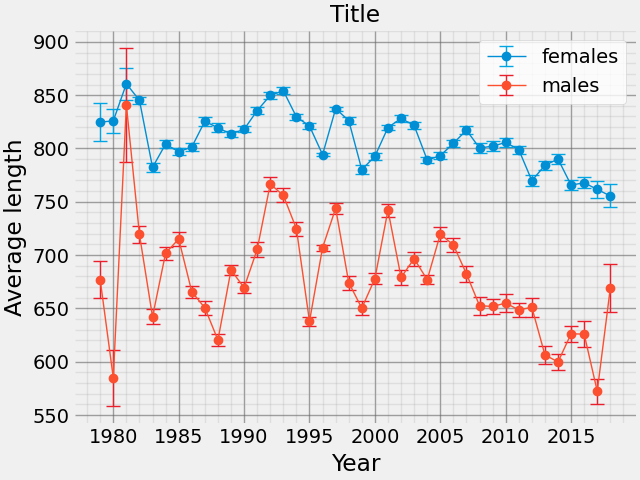

In [26]:
%matplotlib widget

plt.style.use('fivethirtyeight')
fig = plt.figure(1, facecolor = 'white', edgecolor = 'white', constrained_layout = True)#, figsize = (cm2inch(26.0), cm2inch(26.0)))
ax = plt.axes()
ax.set(facecolor = 'white', frame_on = False)

plt.errorbar(chinook_females_Southeast['sample year'], chinook_females_Southeast['length']['mean'], yerr = chinook_females_Southeast['error'], fmt = 'o-', linewidth = 1,
    ecolor = colors['blue'], elinewidth = 1,capsize = 5, capthick = 1, label = 'females')

plt.errorbar(chinook_males_Southeast['sample year'], chinook_males_Southeast['length']['mean'], yerr = chinook_males_Southeast['error'], fmt = 'o-', linewidth = 1,
    ecolor = colors['red'], elinewidth = 1,capsize = 5, capthick = 1, label = 'males')

plt.ylabel('Average length', fontsize = 'large')
plt.xlabel('Year', fontsize = 'large')
plt.title('Title', fontsize = 'large')
plt.legend(framealpha = 0.8, fontsize = 'medium', facecolor = 'white')

plt.grid(visible = True, which = "major", color = "#666666", linestyle = "-", alpha = 0.6)
plt.minorticks_on()
plt.grid(visible = True, which = "minor", color = "#999999", linestyle = "-", alpha = 0.2)

plt.show()

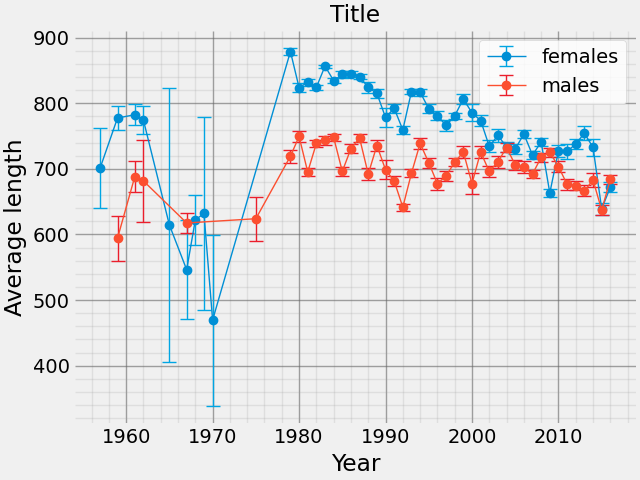

In [27]:
%matplotlib widget

plt.style.use('fivethirtyeight')
fig = plt.figure(2, facecolor = 'white', edgecolor = 'white', constrained_layout = True)#, figsize = (cm2inch(26.0), cm2inch(26.0)))
ax = plt.axes()
ax.set(facecolor = 'white', frame_on = False)

plt.errorbar(chinook_females_bristol_bay['sample year'], chinook_females_bristol_bay['length']['mean'], yerr = chinook_females_bristol_bay['error'], fmt = 'o-', linewidth = 1,
    ecolor = colors['blue'], elinewidth = 1,capsize = 5, capthick = 1, label = 'females')

plt.errorbar(chinook_males_bristol_bay['sample year'], chinook_males_bristol_bay['length']['mean'], yerr = chinook_males_bristol_bay['error'], fmt = 'o-', linewidth = 1,
    ecolor = colors['red'], elinewidth = 1,capsize = 5, capthick = 1, label = 'males')

plt.ylabel('Average length', fontsize = 'large')
plt.xlabel('Year', fontsize = 'large')
plt.title('Title', fontsize = 'large')
plt.legend(framealpha = 0.8, fontsize = 'medium', facecolor = 'white')

plt.grid(visible = True, which = "major", color = "#666666", linestyle = "-", alpha = 0.6)
plt.minorticks_on()
plt.grid(visible = True, which = "minor", color = "#999999", linestyle = "-", alpha = 0.2)

plt.show()

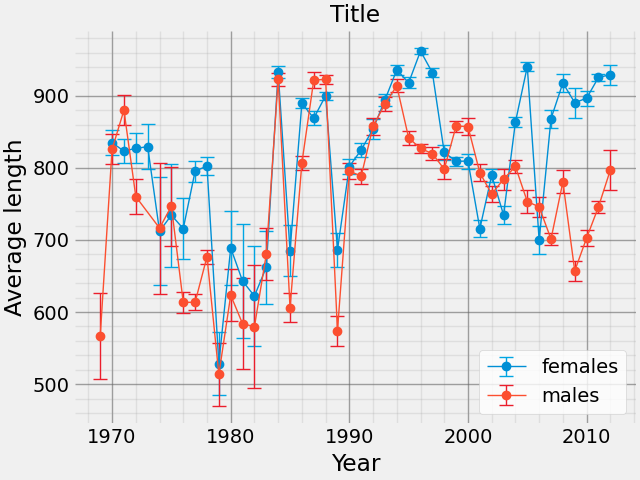

In [28]:
%matplotlib widget

plt.style.use('fivethirtyeight')
fig = plt.figure(3, facecolor = 'white', edgecolor = 'white', constrained_layout = True)#, figsize = (cm2inch(26.0), cm2inch(26.0)))
ax = plt.axes()
ax.set(facecolor = 'white', frame_on = False)

plt.errorbar(chinook_females_cook_inlet['sample year'], chinook_females_cook_inlet['length']['mean'], yerr = chinook_females_cook_inlet['error'], fmt = 'o-', linewidth = 1,
    ecolor = colors['blue'], elinewidth = 1,capsize = 5, capthick = 1, label = 'females')

plt.errorbar(chinook_males_cook_inlet['sample year'], chinook_males_cook_inlet['length']['mean'], yerr = chinook_males_cook_inlet['error'], fmt = 'o-', linewidth = 1,
    ecolor = colors['red'], elinewidth = 1,capsize = 5, capthick = 1, label = 'males')

plt.ylabel('Average length', fontsize = 'large')
plt.xlabel('Year', fontsize = 'large')
plt.title('Title', fontsize = 'large')
plt.legend(framealpha = 0.8, fontsize = 'medium', facecolor = 'white')

plt.grid(visible = True, which = "major", color = "#666666", linestyle = "-", alpha = 0.6)
plt.minorticks_on()
plt.grid(visible = True, which = "minor", color = "#999999", linestyle = "-", alpha = 0.2)

plt.show()

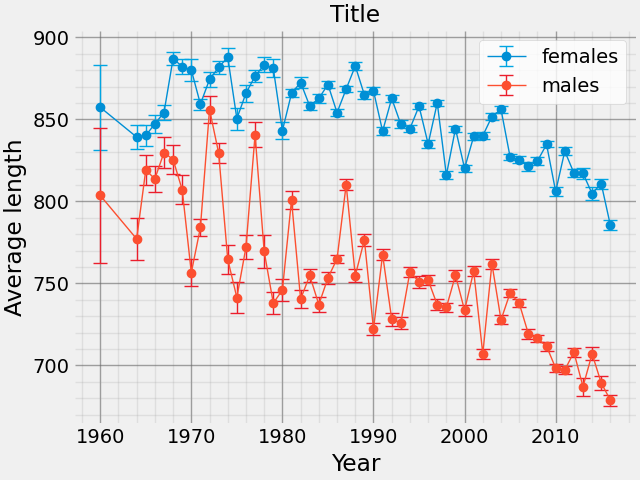

In [29]:
%matplotlib widget

plt.style.use('fivethirtyeight')
fig = plt.figure(4, facecolor = 'white', edgecolor = 'white', constrained_layout = True)#, figsize = (cm2inch(26.0), cm2inch(26.0)))
ax = plt.axes()
ax.set(facecolor = 'white', frame_on = False)

plt.errorbar(chinook_females_yukon['sample year'], chinook_females_yukon['length']['mean'], yerr = chinook_females_yukon['error'], fmt = 'o-', linewidth = 1,
    ecolor = colors['blue'], elinewidth = 1,capsize = 5, capthick = 1, label = 'females')

plt.errorbar(chinook_males_yukon['sample year'], chinook_males_yukon['length']['mean'], yerr = chinook_males_yukon['error'], fmt = 'o-', linewidth = 1,
    ecolor = colors['red'], elinewidth = 1,capsize = 5, capthick = 1, label = 'males')

plt.ylabel('Average length', fontsize = 'large')
plt.xlabel('Year', fontsize = 'large')
plt.title('Title', fontsize = 'large')
plt.legend(framealpha = 0.8, fontsize = 'medium', facecolor = 'white')

plt.grid(visible = True, which = "major", color = "#666666", linestyle = "-", alpha = 0.6)
plt.minorticks_on()
plt.grid(visible = True, which = "minor", color = "#999999", linestyle = "-", alpha = 0.2)

plt.show()

All four plot into one plot

In [30]:
print('min values:', np.min(chinook_females_Southeast['sample year']),
    np.min(chinook_females_bristol_bay['sample year']),
    np.min(chinook_females_cook_inlet['sample year']),
    np.min(chinook_females_yukon['sample year']),
    'max values:', np.max(chinook_females_Southeast['sample year']),
    np.max(chinook_females_bristol_bay['sample year']),
    np.max(chinook_females_cook_inlet['sample year']),
    np.max(chinook_females_yukon['sample year']))

min values: 1979.0 1957.0 1970.0 1960.0 max values: 2018.0 2016.0 2012.0 2016.0


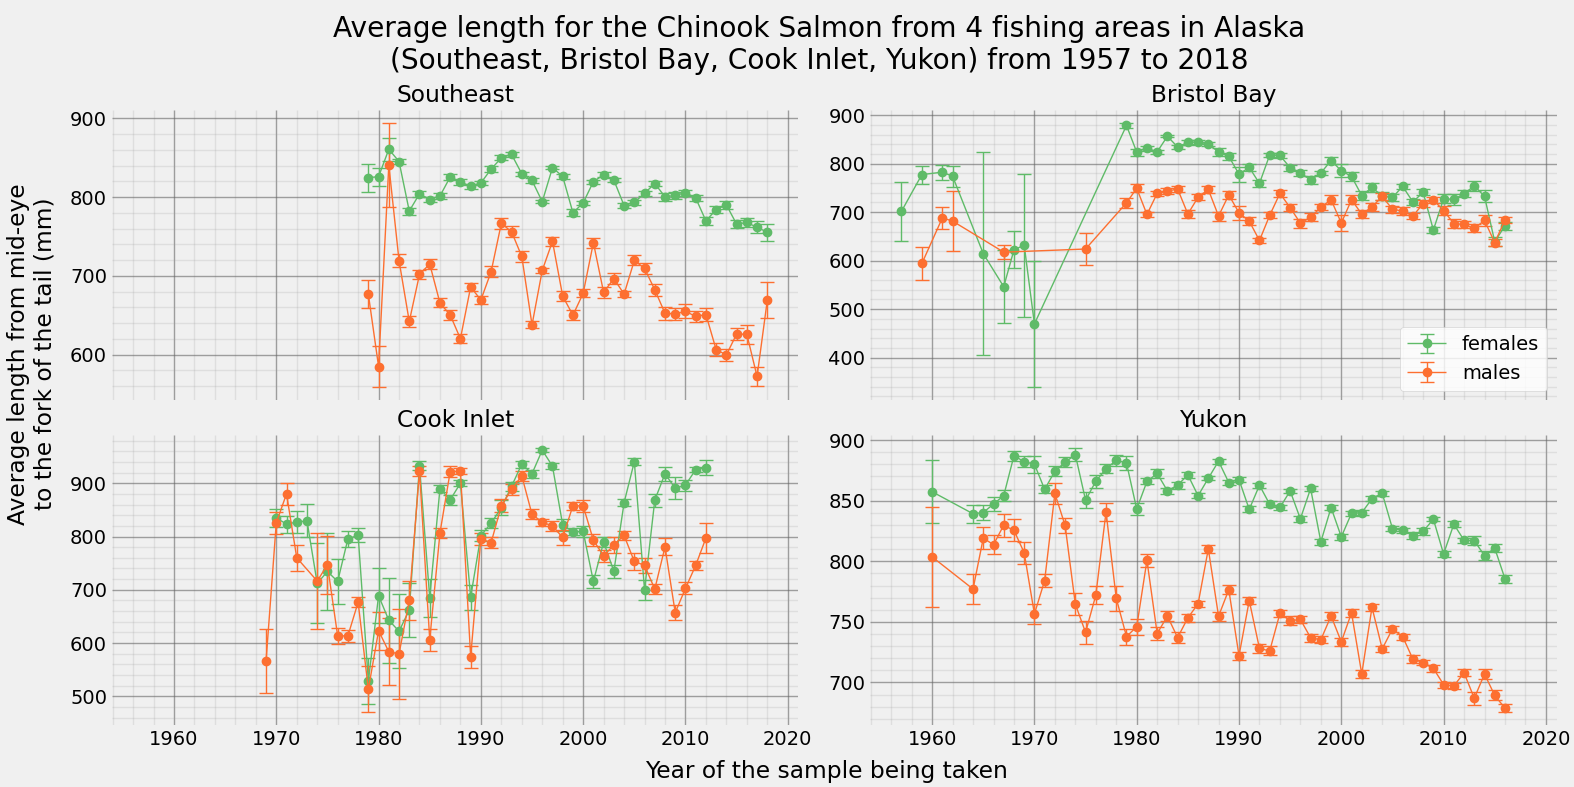

In [32]:
%matplotlib widget

plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(2, 2, facecolor = 'white', edgecolor = 'white', constrained_layout = True, sharex = True, figsize = (cm2inch(40), cm2inch(20)))

((ax1,ax2), (ax3,ax4)) = axes

for i in axes:
    for j in range(len(i)):
        i[j].set(facecolor = 'white', frame_on = False)
        i[j].grid(visible = False)
        i[j].grid(visible = True, which = 'major', color = '#666666', linestyle = '-', alpha = 0.6)
        i[j].minorticks_on()
        i[j].grid(visible = True, which = 'minor', color = '#999999', linestyle = '-', alpha = 0.2)

ax1.errorbar(chinook_females_Southeast['sample year'], chinook_females_Southeast['length']['mean'], yerr = chinook_females_Southeast['error'], fmt = 'o-', color = colors['green'], linewidth = 1,
    elinewidth = 1,capsize = 5, capthick = 1, label = 'females')
ax1.errorbar(chinook_males_Southeast['sample year'], chinook_males_Southeast['length']['mean'], yerr = chinook_males_Southeast['error'], fmt = 'o-', color = colors['orange1'], linewidth = 1,
    elinewidth = 1,capsize = 5, capthick = 1, label = 'males')
ax1.set_title('\n\n\nSoutheast', fontsize = 'large')

ax2.errorbar(chinook_females_bristol_bay['sample year'], chinook_females_bristol_bay['length']['mean'], yerr = chinook_females_bristol_bay['error'], fmt = 'o-', color = colors['green'], linewidth = 1,
    elinewidth = 1,capsize = 5, capthick = 1, label = 'females')
ax2.errorbar(chinook_males_bristol_bay['sample year'], chinook_males_bristol_bay['length']['mean'], yerr = chinook_males_bristol_bay['error'], fmt = 'o-', color = colors['orange1'], linewidth = 1,
    elinewidth = 1,capsize = 5, capthick = 1, label = 'males')
ax2.set_title('Bristol Bay', fontsize = 'large')
ax2.legend(framealpha = 0.8, fontsize = 'medium', facecolor = 'white')

ax3.errorbar(chinook_females_cook_inlet['sample year'], chinook_females_cook_inlet['length']['mean'], yerr = chinook_females_cook_inlet['error'], fmt = 'o-', color = colors['green'], linewidth = 1,
    elinewidth = 1,capsize = 5, capthick = 1, label = 'females')
ax3.errorbar(chinook_males_cook_inlet['sample year'], chinook_males_cook_inlet['length']['mean'], yerr = chinook_males_cook_inlet['error'], fmt = 'o-', color = colors['orange1'], linewidth = 1,
    elinewidth = 1,capsize = 5, capthick = 1, label = 'males')
ax3.set_title('Cook Inlet', fontsize = 'large')

ax4.errorbar(chinook_females_yukon['sample year'], chinook_females_yukon['length']['mean'], yerr = chinook_females_yukon['error'], fmt = 'o-', color = colors['green'], linewidth = 1,
    elinewidth = 1,capsize = 5, capthick = 1, label = 'females')
ax4.errorbar(chinook_males_yukon['sample year'], chinook_males_yukon['length']['mean'], yerr = chinook_males_yukon['error'], fmt = 'o-', color = colors['orange1'], linewidth = 1,
    elinewidth = 1,capsize = 5, capthick = 1, label = 'males')
ax4.set_title('Yukon', fontsize = 'large')

# to set the labels
ax1.set_ylabel(' \n ', fontsize = 'x-large', color = 'white')
ax3.set_xlabel(' ', fontsize = 'x-large', color = 'white')
# ax1.set_title(' \n \n ', fontsize = 'x-large', color = 'white')

fig.text(0.020, 0.55, 'Average length from mid-eye\nto the fork of the tail (mm)', fontsize = 'large' , ha = 'center', va = 'center', rotation = 90)
fig.text(0.525, 0.02, 'Year of the sample being taken', fontsize = 'large' , ha = 'center', va = 'center')
fig.text(0.520, 0.9425, 'Average length for the Chinook Salmon from 4 fishing areas in Alaska\n(Southeast, Bristol Bay, Cook Inlet, Yukon) from 1957 to 2018', fontsize = 'x-large' , ha = 'center', va = 'center')

plt.savefig('week_4_assignment_final_graph.jpg', dpi = 600, facecolor = fig.get_facecolor(), edgecolor='none')

plt.show()